In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
emission = tables[1]
emission.columns = ["country", "1990", "2005", "2017", "2017(%world)", "2017 vs 1990(%)", "2017(/land)", "2017(/capita)", "total 2018(incl)", "total 2018(excl)"]

# Filter countries
emission = emission.loc[3:, "country":"2017"]
emission

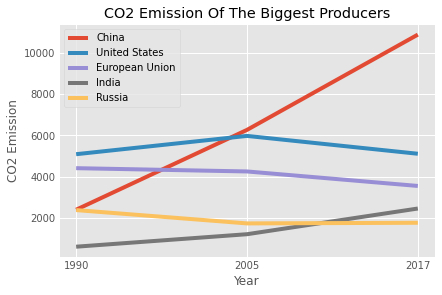

In [76]:
plt.style.use('ggplot')

# 5 biggest producers
bigger_producers = emission.nlargest(5, "2017")

# Graph 1
years = bigger_producers.columns[1:4]

plt.subplots()
for index, row in bigger_producers.iterrows():
  plt.plot(years, row[1:4], label=row[0])

plt.title('CO2 Emission Of The Biggest Producers')
plt.xlabel('Year')
plt.ylabel("CO2 Emission")
plt.legend()


plt.show()

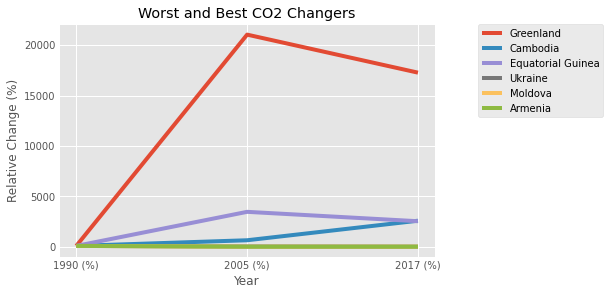

In [82]:
# Relative change compared to year 1990
emission["1990 (%)"] = 100
emission["2005 (%)"] = np.round(emission.loc[:, "2005"] / emission.loc[:, "1990"] * 100, 1)
emission["2017 (%)"] = np.round(emission.loc[:, "2017"] / emission.loc[:, "1990"] * 100, 1)
emission

# Top 3 and bottom 3 countries
top_bottom = emission.sort_values(by=["2017 (%)"], ascending=False).iloc[np.r_[0:3,-3:-0]]
top_bottom

# Graph 2
years = top_bottom.columns[4:7]

plt.subplots()
for index, row in top_bottom.iterrows():
  plt.plot(years, row[4:7], label=row[0])

plt.title("Worst and Best CO2 Changers")
plt.xlabel("Year")
plt.ylabel("Relative Change (%)")
plt.legend(bbox_to_anchor=(1.1,1.02))


plt.show()

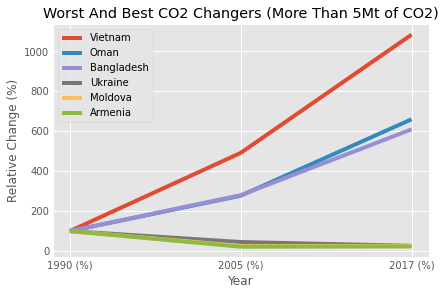

In [83]:
# Graph 2: More than 5Mt CO2 Emission in 1990
new_top_bottom = emission.loc[emission["1990"]>5].sort_values(by=["2017 (%)"], ascending=False).iloc[np.r_[0:3,-3:-0]]
years = new_top_bottom.columns[4:7]

plt.subplots()

for index, row in new_top_bottom.iterrows():
  plt.plot(years, row[4:7], label=row[0])
  


plt.title("Worst And Best CO2 Changers (More Than 5Mt of CO2)")
plt.xlabel("Year")
plt.ylabel("Relative Change (%)")
plt.legend()




plt.show()